In [1]:
import numpy as np
import pandas as pd

In [2]:
tweet=pd.read_csv("D:\\Technocolabs\\training-dump.csv")

In [3]:
tweet.head(3)

,banned_by,no_follow,link_id,gilded,author,author_verified,author_comment_karma,author_link_karma,num_comments,created_utc,...,body,downs,is_submitter,num_reports,controversiality,quarantine,ups,is_bot,is_troll,recent_comments
0,NaN,True,t3_2l5szg,0,ADHDbot,False,-6,1,1.0,1415026958,...,"As per the rules in the side bar, yes or no qu...",0,False,NaN,0,False,1,True,False,[]
1,NaN,True,t3_2l61gs,0,ADHDbot,False,-6,1,1.0,1415031687,...,Meme and image posts are not allowed on this s...,0,False,NaN,0,False,1,True,False,"[{""banned_by"":null,""no_follow"":true,""link_id"":..."
2,NaN,True,t3_2l7ma8,0,ADHDbot,False,-6,1,1.0,1415060465,...,"As per the rules in the side bar, yes or no qu...",0,False,NaN,0,False,1,True,False,"[{""banned_by"":null,""no_follow"":true,""link_id"":..."


In [4]:
tweet.columns

Index(['banned_by', 'no_follow', 'link_id', 'gilded', 'author',
       'author_verified', 'author_comment_karma', 'author_link_karma',
       'num_comments', 'created_utc', 'score', 'over_18', 'body', 'downs',
       'is_submitter', 'num_reports', 'controversiality', 'quarantine', 'ups',
       'is_bot', 'is_troll', 'recent_comments'],
      dtype='object')

In [5]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267036 entries, 0 to 267035
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   banned_by             0 non-null       float64
 1   no_follow             267036 non-null  bool   
 2   link_id               267036 non-null  object 
 3   gilded                267036 non-null  int64  
 4   author                267036 non-null  object 
 5   author_verified       267036 non-null  bool   
 6   author_comment_karma  267036 non-null  int64  
 7   author_link_karma     267036 non-null  int64  
 8   num_comments          266950 non-null  float64
 9   created_utc           267036 non-null  int64  
 10  score                 267036 non-null  int64  
 11  over_18               267036 non-null  bool   
 12  body                  267035 non-null  object 
 13  downs                 267036 non-null  int64  
 14  is_submitter          267036 non-null  bool   
 15  

In [6]:
troll_bot=tweet.drop(['banned_by', 'body','downs','quarantine', 'num_reports', 'num_comments', 'score', 'ups', 'controversiality', 'gilded'],axis=1)
troll_bot.drop_duplicates(inplace=True)

# format columns
troll_bot['created_utc'] = pd.to_datetime(troll_bot['created_utc'].values, unit='s')
#troll_bot['body'] = troll_bot['body'].str.slice(stop=200).fillna('')


In [7]:
troll_bot

,no_follow,link_id,author,author_verified,author_comment_karma,author_link_karma,created_utc,over_18,is_submitter,is_bot,is_troll,recent_comments
0,True,t3_2l5szg,ADHDbot,False,-6,1,2014-11-03 15:02:38,False,False,True,False,[]
1,True,t3_2l61gs,ADHDbot,False,-6,1,2014-11-03 16:21:27,False,False,True,False,"[{""banned_by"":null,""no_follow"":true,""link_id"":..."
2,True,t3_2l7ma8,ADHDbot,False,-6,1,2014-11-04 00:21:05,False,False,True,False,"[{""banned_by"":null,""no_follow"":true,""link_id"":..."
3,True,t3_2l7t5h,ADHDbot,False,-6,1,2014-11-04 01:23:18,False,False,True,False,"[{""banned_by"":null,""no_follow"":true,""link_id"":..."
4,True,t3_2l900k,ADHDbot,False,-6,1,2014-11-04 10:15:33,False,False,True,False,"[{""banned_by"":null,""no_follow"":true,""link_id"":..."
...,...,...,...,...,...,...,...,...,...,...,...,...
267027,True,t3_52doh1,haiku_robot,True,159092,1,2016-09-12 15:41:06,False,False,True,False,"[{""banned_by"":null,""no_follow"":true,""link_id"":..."
267028,False,t3_52drz9,haiku_robot,True,159092,1,2016-09-12 15:41:11,False,False,True,False,"[{""banned_by"":null,""no_follow"":true,""link_id"":..."
267029,True,t3_52d5po,haiku_robot,True,159092,1,2016-09-12 15:41:14,False,False,True,False,"[{""banned_by"":null,""no_follow"":true,""link_id"":..."
267030,False,t3_52drtm,haiku_robot,True,159092,1,2016-09-12 15:41:17,False,False,True,False,"[{""banned_by"":null,""no_follow"":true,""link_id"":..."


In [8]:
# Count num of bots and trolls
bots = troll_bot['is_bot']
trolls = troll_bot['is_troll']
normies = troll_bot[(troll_bot.is_bot == False) & (troll_bot.is_troll == False)]
print("Number of bot comments: ", bots.sum())
print("Number of troll comments:", trolls.sum())
print("Number of normal comments:", len(normies))

Number of bot comments:  220534
Number of troll comments: 6562
Number of normal comments: 0


In [9]:
bot_authors = troll_bot[troll_bot['is_bot'] == True][['author']]
troll_authors = troll_bot[troll_bot['is_troll'] == True][['author']]
print("Number of bot authors: ", len(np.unique(bot_authors)))
print("Number of troll authors:", len(np.unique(troll_authors)))

# Num of users
users = troll_bot['author'].values
num_of_users = np.unique(users)
print("Number of total authors: ", len(num_of_users))

Number of bot authors:  343
Number of troll authors: 153
Number of total authors:  496


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [10]:
input_X=troll_bot.drop(["is_bot","is_troll","link_id","author","created_utc","recent_comments"],axis=1)
#input_X=tweet[["no_follow","gilded","author_verified","author_comment_karma","created_utc",
 #             "score","over_18","is_submitter","controversiality","ups"]]

input_y=troll_bot["is_bot"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(input_X, input_y,test_size=0.33)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((152154, 6), (74942, 6), (152154,), (74942,))

In [14]:
#clf=DecisionTreeClassifier(max_depth=3,min_samples_leaf=100)
clf = DecisionTreeClassifier(max_depth=3, 
                             min_samples_leaf=100)

clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
clf.score(X_train, y_train)

0.9920080970595581

In [17]:
#pred_labels_tree=dt.predict(test_features)
#pred_labels_tree

y_pred=clf.predict(X_test)
y_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9920605268073978

In [19]:
input_y.value_counts()

True     220534
False      6562
Name: is_bot, dtype: int64

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 1618,   572],
       [   23, 72729]], dtype=int64)

In [21]:
Recall=1618/(1618+572)
Recall

0.7388127853881279

In [22]:
Precision=1618/(1618+23)
Precision

0.9859841560024375

In [23]:
from sklearn.metrics import classification_report
class_rep_tree = classification_report(y_test, y_pred)
class_rep_tree

'              precision    recall  f1-score   support\n\n       False       0.99      0.74      0.84      2190\n        True       0.99      1.00      1.00     72752\n\n    accuracy                           0.99     74942\n   macro avg       0.99      0.87      0.92     74942\nweighted avg       0.99      0.99      0.99     74942\n'

[Text(125.55000000000001, 190.26, 'X[1] <= 0.5\nentropy = 0.056\nsamples = 152154\nvalue = [4372, 147782]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 135317\nvalue = [0, 135317]'),
 Text(167.4, 135.9, 'X[2] <= 4932.0\nentropy = 0.384\nsamples = 16837\nvalue = [4372, 12465]'),
 Text(83.7, 81.53999999999999, 'X[3] <= 350.0\nentropy = 0.414\nsamples = 5992\nvalue = [4237, 1755]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.469\nsamples = 2720\nvalue = [1023, 1697]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.035\nsamples = 3272\nvalue = [3214, 58]'),
 Text(251.10000000000002, 81.53999999999999, 'X[3] <= 622.0\nentropy = 0.025\nsamples = 10845\nvalue = [135, 10710]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.0\nsamples = 7898\nvalue = [0, 7898]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.087\nsamples = 2947\nvalue = [135, 2812]')]

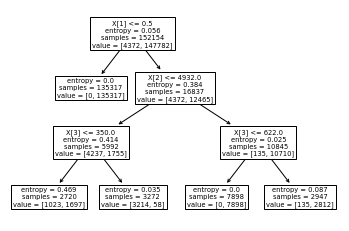

In [65]:
import matplotlib.pyplot as plt
from sklearn import tree

tree.plot_tree(clf)

In [27]:
#Compare our decision tree to a logistic regression

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logit = logreg.predict(X_test)

# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(y_test, y_pred)
class_rep_log = classification_report(y_test, y_pred_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Decision Tree: 
               precision    recall  f1-score   support

       False       0.99      0.74      0.84      2190
        True       0.99      1.00      1.00     72752

    accuracy                           0.99     74942
   macro avg       0.99      0.87      0.92     74942
weighted avg       0.99      0.99      0.99     74942

Logistic Regression: 
               precision    recall  f1-score   support

       False       0.00      0.00      0.00      2190
        True       0.97      1.00      0.99     72752

    accuracy                           0.97     74942
   macro avg       0.49      0.50      0.49     74942
weighted avg       0.94      0.97      0.96     74942



C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,cross_val_predict

# Set up our K-fold cross-validation
kf = StratifiedKFold(n_splits=10,)

decision_tree = DecisionTreeClassifier()
logistic_reg = LogisticRegression(max_iter=1000)

# Train our models using KFold cv
dtree_score = cross_val_score(decision_tree,input_X,input_y, cv = kf,scoring='roc_auc')
lr_score = cross_val_score(logistic_reg,input_X,input_y, cv = kf,scoring='roc_auc')

# Print the mean of each array of scores
print("Decision Tree:", np.mean(dtree_score),"Logistic Regression:", np.mean(lr_score))

C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

Decision Tree: 0.9633255087527018 Logistic Regression: 0.9375183745573736


In [32]:
#Balance the dataset

true_only =troll_bot.loc[troll_bot['is_bot'] == 1]
false_only =troll_bot.loc[troll_bot['is_bot'] == 0]
true_only.shape, false_only.shape

((220534, 12), (6562, 12))

In [33]:
true_only = true_only.sample(n= false_only.shape[0])
false_only.shape, true_only.shape

((6562, 12), (6562, 12))

In [34]:
tf_bal = pd.concat([true_only,false_only])
tf_bal.head()

,no_follow,link_id,author,author_verified,author_comment_karma,author_link_karma,created_utc,over_18,is_submitter,is_bot,is_troll,recent_comments
51511,True,t3_3w61cl,PleaseRespectTables,False,171055,29,2015-12-10 11:24:12,False,False,True,False,"[{""banned_by"":null,""no_follow"":true,""link_id"":..."
38630,True,t3_1qxfz3,IsItDownBot,False,236,1,2014-03-13 18:04:37,False,False,True,False,"[{""banned_by"":null,""no_follow"":true,""link_id"":..."
208053,True,t3_1o40ik,imirror_bot,False,5507,1,2013-10-10 03:49:27,False,False,True,False,"[{""banned_by"":null,""no_follow"":true,""link_id"":..."
173000,False,t3_5dkp1b,xkcd_bot,False,55574,126,2016-11-18 05:05:38,False,False,True,False,"[{""banned_by"":null,""no_follow"":false,""link_id""..."
203312,True,t3_ajgv2g,qznc_bot,False,2433,159319,2019-01-24 20:46:16,False,True,True,False,"[{""banned_by"":null,""no_follow"":true,""link_id"":..."


In [36]:
feature = tf_bal.drop(['is_bot','created_utc','recent_comments'], axis = 1)

In [40]:
feat=['no_follow','link_id','author_verified','author','no_follow','over_18','is_submitter']

In [41]:
for i in feat:
  feature[i] = feature[i].astype('category')
  feature[i] = feature[i].cat.codes
feature.head()

,no_follow,link_id,author,author_verified,author_comment_karma,author_link_karma,over_18,is_submitter,is_troll
51511,1,5088,174,0,171055,29,0,0,False
38630,1,562,105,0,236,1,0,0,False
208053,1,335,339,0,5507,1,0,0,False
173000,0,7721,429,0,55574,126,0,0,False
203312,1,10710,375,0,2433,159319,0,1,False


In [42]:
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a variable
scaler = StandardScaler()
scaled_train_feat = scaler.fit_transform(feature)

In [43]:
np.mean(scaled_train_feat),np.std(scaled_train_feat)

(7.70001271439033e-18, 1.0)

In [44]:
label=tf_bal.is_bot.astype('int64')

In [67]:
train_feature, test_feature, train_label, test_label = train_test_split(scaled_train_feat, label,test_size=0.25)
d_tree1 = DecisionTreeClassifier()
d_tree1.fit(train_feature, train_label)
pred_label_tree1 = d_tree1.predict(test_feature)

In [68]:
from sklearn.metrics import classification_report
class_rep_tree1 = classification_report(test_label, pred_label_tree1)
class_rep_tree1

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1612\n           1       1.00      1.00      1.00      1669\n\n    accuracy                           1.00      3281\n   macro avg       1.00      1.00      1.00      3281\nweighted avg       1.00      1.00      1.00      3281\n'

[Text(167.4, 163.07999999999998, 'X[8] <= 0.0\nentropy = 0.5\nsamples = 9843\nvalue = [4950, 4893]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 4893\nvalue = [0, 4893]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 4950\nvalue = [4950, 0]')]

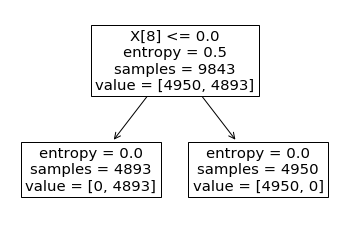

In [69]:
tree.plot_tree(d_tree1)

In [49]:
lr1 = LogisticRegression(random_state = 10)
lr1.fit(train_feature, train_label)
pred_label_logit1 = lr1.predict(test_feature)

C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
class_rep_log1 = classification_report(test_label, pred_label_logit1)
class_rep_log1

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1969\n           1       1.00      1.00      1.00      1969\n\n    accuracy                           1.00      3938\n   macro avg       1.00      1.00      1.00      3938\nweighted avg       1.00      1.00      1.00      3938\n'

In [59]:
dtree_score1 = cross_val_score(decision_tree,feature, label, cv = kf,scoring='roc_auc')
lr_score1 = cross_val_score(logistic_reg,feature, label, cv = kf,scoring='roc_auc')

# Print the mean of each array of scores
print("Decision Tree:", np.mean(dtree_score1),"Logistic Regression:", np.mean(lr_score1))

C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

Decision Tree: 1.0 Logistic Regression: 0.8621881877480346


C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SANDHYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=50)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
y_pred=classifier.predict(X_test)

In [72]:
#Results

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
result=confusion_matrix(y_test,y_pred)
print("Confusion matrix:")
print(result)

result1=classification_report(y_test,y_pred)
print("Classification report:")
print(result1)

result2=accuracy_score(y_test,y_pred)
print("Accuracy Score:")
print(result2)

Confusion matrix:
[[ 2189     1]
 [    0 72752]]
Classification report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2190
        True       1.00      1.00      1.00     72752

    accuracy                           1.00     74942
   macro avg       1.00      1.00      1.00     74942
weighted avg       1.00      1.00      1.00     74942

Accuracy Score:
0.9999866563475754


In [ ]:
#Hence, logistic regression model has 86.2% accuracy for a balanced dataset.